# Building a Handwritten Digits Classifier

In this project deep freeforward neural networks will be used to train and test models for classifying hand written digits. During the course of the project, we will also explore the limitations of traditional machine learning models used for image classification. 

# Reading the dataset

The dataset for the project is from the preloaded hand-written digits contained in the sklearn library within the namespace sklearn.datasets. For access and documentation about the hand-written digits dataset click [here](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). The load_digits funtion will be used to load the dataset.

In [1]:
# Reading the dataset

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()
digits_data

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [2]:
# Transforming the Numpy 2D array to pandas dataframe

data = pd.DataFrame(digits_data['data'])
print(data.shape)
data.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
labels = pd.Series(digits_data['target'])
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

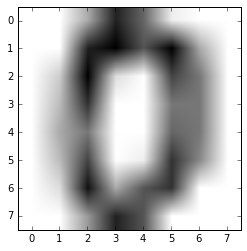

In [4]:
# Reshaping the first image data and showing the image

first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

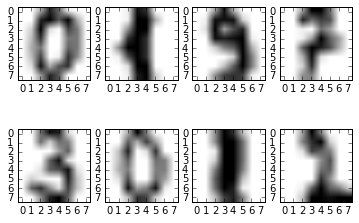

In [5]:
# Displaying multiple plots on a 2 by 4 grid

fig, ax = plt.subplots(2, 4)

# First rwo
ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

# Second row
ax[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')


# Implementing a k-nearest neigbors algorithm

Using a regression model or a logistic regression model will not be ideal for capturing the image data cannot be assumed to be linear. The k-nearest neigbors algorithm is better at catching the nonlinearity in the data. The algorithm assigns the most closest observation indexed by the mean observation and assigns that observation as the prediction of the unseen observation. Training, testing and a k-fold cross validation is conducted below on the dataset.

In [6]:
# Creating a test function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(nneighbors, train_features, train_labels):
    neigh = KNeighborsClassifier(n_neighbors = nneighbors)
    neigh_fit = neigh.fit(train_features, train_labels)
    return neigh

In [7]:
# Creating a test function

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracies = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/ len(train_test_df)
    return overall_accuracies
    

In [8]:
# Creating a 4-fold cross validation

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

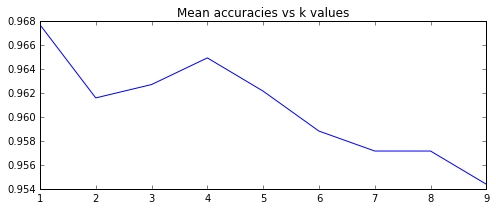

In [9]:
# Plotting the classification accuracies for a set of k values

k_values = list(range(1,10))
class_accuracies = []

for i in k_values:
    k_accuracies = cross_validate(i)
    mean_accuracies = np.mean(k_accuracies)
    class_accuracies.append(mean_accuracies)
    
plt.figure(figsize = (8,3))    
plt.plot(k_values, class_accuracies)
plt.title('Mean accuracies vs k values')

In [10]:
class_accuracies

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9621665429349171,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697]

From the plot of 10 k-values' mean accuracies for the K neighbors classifier algorithms the highest k-value is a model with 1 nearest neighbor with a mean accuracy of 96 percent. Overall the accuracies go down as the k-values are increased with the optimal k-values at 4.

# Neural Network with a Single Hidden Layer

The downside of the k-nearest neighbors algorithm is its high memory usage in making comparisons to image data. A neural network model with one hidden layer to make comparion with the created k-nearest neighbors algorithm.

In [11]:
# Creating a training function

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_nn(neuron_arch, train_features, train_labels):
    nnc = MLPClassifier(hidden_layer_sizes=neuron_arch)
    nnc.fit(train_features, train_labels)
    return nnc


In [12]:
# Creating a testing function

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy


In [13]:
# Creating a 4 fold cross validation function

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



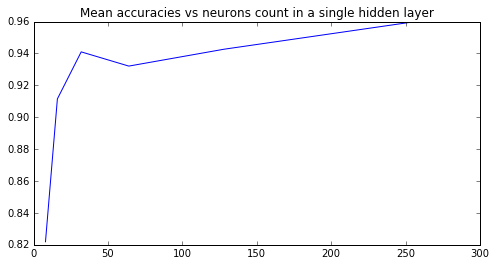

In [14]:
# Testing the neural network model with different neuron numbers

single_layer_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

single_layer_accuracies = []

for n in single_layer_neurons:
    accuracies = cross_validate(n)
    mean_accuracies = np.mean(accuracies)
    single_layer_accuracies.append(mean_accuracies)
    
plt.figure(figsize=(8,4))
plt.title('Mean accuracies vs neurons count in a single hidden layer') 

neuron_count = [n[0] for n in single_layer_neurons]
plt.plot(neuron_count, single_layer_accuracies)

In [15]:
single_layer_accuracies

[0.8219141301658005,
 0.911508290027221,
 0.9410121257114575,
 0.9320935412026726,
 0.942676317743133,
 0.9599282355852512]

The performance of the single layer neural network models in general improve with the increase in the number of neurons. Since the optimal number of neurons with the highest mean accuracy converges to 95% there is no need to use a single hidden layer neural network compared to using a k nearest neighbor model.   

# Investigating overfitting for the single layer model

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Accuracies for the training data
def overfit_train(neuron_arch, train_features, train_labels):
    nnc = MLPClassifier(hidden_layer_sizes=neuron_arch)
    model = nnc.fit(train_features, train_labels)

    predictions = model.predict(train_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = train_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# Accuracies for the test data using k fold
def mean_train_nn(neuron_arch, train_features, train_labels):
    nnc = MLPClassifier(hidden_layer_sizes=neuron_arch)
    nnc.fit(train_features, train_labels)
    return nnc

def mean_test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def mean_cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = mean_train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = mean_test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return np.mean(fold_accuracies) ## take mean of all of the accuracies

one_layer_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

neuron_accuracies_train = []
neuron_accuracies_test = []
for n in one_layer_neurons:
    model_train_accuracy = overfit_train(n[0], data, labels)
    model_test_accuracy = mean_cross_validate(n[0])
    neuron_accuracies_train.append(model_train_accuracy)
    neuron_accuracies_test.append(model_test_accuracy)
    
print(neuron_accuracies_train)
print(neuron_accuracies_test)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9588202559821926, 0.989983305509182, 1.0, 1.0, 1.0, 1.0]
[0.8681007176441475, 0.9142996782974511, 0.9371096263301163, 0.9504677060133631, 0.9521306607275427, 0.9482355852511755]


<function matplotlib.pyplot.show>

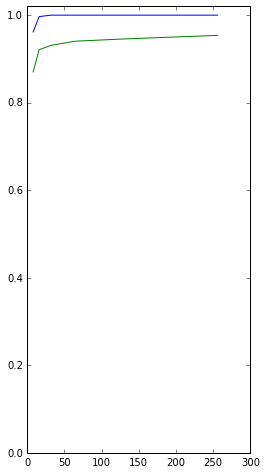

In [17]:
# Plotting the performance

plt.figure(figsize = (4,8))
plt.plot([i[0] for i in one_layer_neurons], neuron_accuracies_train)
plt.plot([i[0] for i in one_layer_neurons], neuron_accuracies_test)
plt.ylim((0, 1.020))
plt.show

From the plot as the number of neurons for the models increase the neural network models perform better on overfitting comparing the training and testing dataset preformance. Of the 6 models the model with 8 neurons tends to overfit the training data compared to the other models

# Neural Network with Two Hidden Layers

Adding more neurons to the hidden layer improves the accuracy of the models. One more hidden layer and an increase in the neurons in each area is added below to check if the mean accuracies improve.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



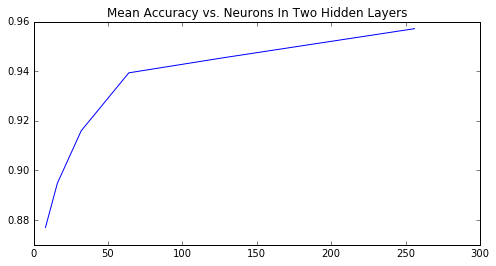

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_nn(neuron_arch, train_features, train_labels):
    nnc = MLPClassifier(hidden_layer_sizes=neuron_arch)
    nnc.fit(train_features, train_labels)
    return nnc

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

nn_two_neurons = [
    (8,8),
    (16,8),
    (32,8),
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [21]:
nn_two_accuracies

[0.8770019797079931,
 0.894828012868102,
 0.9159638703291265,
 0.9393392724573126,
 0.945463994060876,
 0.9571479831724821]

The mean accuracies using two layers overall have an increasing trend with a maximum mean accuracy at 95% which indicates that the addition of one more hidden layer with an increase in the number of neurons in general are able to capture more of the complexities of the image data compare to just a single hidden layer neuron network model. The two hidden layer models will be investigated for overfitting below.

# Investigating overfitting of the two hidden layer neural network models

In [25]:
two_layer_neurons = [
    (8,8),
    (16,16),
    (32,32),
    (64,64),
    (128,128),
    (256,256)
]

neuron_accuracies_train = []
neuron_accuracies_test = []
for n in one_layer_neurons:
    model_train_accuracy = overfit_train(n[0], data, labels)
    model_test_accuracy = mean_cross_validate(n[0])
    neuron_accuracies_train.append(model_train_accuracy)
    neuron_accuracies_test.append(model_test_accuracy)
    
print(neuron_accuracies_train)
print(neuron_accuracies_test)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9710628825820813, 0.996661101836394, 1.0, 1.0, 1.0, 1.0]
[0.7824585498638951, 0.9059589210591439, 0.9315515961395693, 0.9359997525365009, 0.9465689185845088, 0.9504701806483543]


<function matplotlib.pyplot.show>

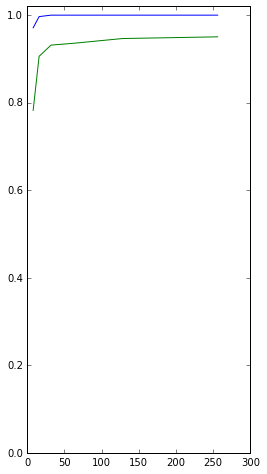

In [27]:
# Plotting the performance

plt.figure(figsize = (4,8))
plt.plot([i[0] for i in two_layer_neurons], neuron_accuracies_train)
plt.plot([i[0] for i in two_layer_neurons], neuron_accuracies_test)
plt.ylim((0, 1.020))
plt.show

Adding one more hidden layer tends to make the models overfit compared to the single layer. The two models that tend to overfit compared to the others are the two hidden layer models with both 8 and 16 neurons each. They both do poorly with the testing dataset compared to the training dataset.

# Neural Network with Three Hidden Layers

A three layers neuron network model is used to fit the data to compare to the other models so far developed in the project. To prevent overfitting the number of k-fold validation will be increased to 6 with 3 hidden layers to further randomize the test data. 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



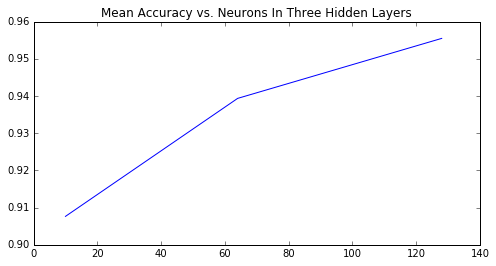

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

def train_nn(neuron_arch, train_features, train_labels):
    nnc = MLPClassifier(hidden_layer_sizes=neuron_arch)
    nnc.fit(train_features, train_labels)
    return nnc

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]
nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [31]:
nn_three_accuracies

[0.9076402824228911, 0.9393589743589744, 0.9554868078781121]

Compared to the other neural network models the mean accuracy has increased over 90%. The inclusion of more neurons to a three neural network model makes the model fit the data even more accurately. Overfitting for this model is done below  

# Investigating 3 hidden layers for overfitting

In [33]:
three_layer_neurons = [
    (10,10,10),
    (64,64,64),
    (128,128,128),
    
]

neuron_accuracies_train = []
neuron_accuracies_test = []
for n in three_layer_neurons:
    model_train_accuracy = overfit_train(n[0], data, labels)
    model_test_accuracy = mean_cross_validate(n[0])
    neuron_accuracies_train.append(model_train_accuracy)
    neuron_accuracies_test.append(model_test_accuracy)
    
print(neuron_accuracies_train)
print(neuron_accuracies_test)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9782971619365609, 1.0, 1.0]
[0.8965021034397426, 0.9410121257114574, 0.9460170749814403]


<function matplotlib.pyplot.show>

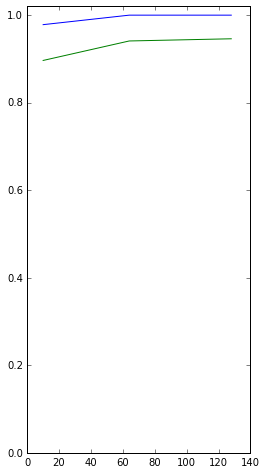

In [35]:
# Plotting the performance

plt.figure(figsize = (4,8))
plt.plot([i[0] for i in three_layer_neurons], neuron_accuracies_train)
plt.plot([i[0] for i in three_layer_neurons], neuron_accuracies_test)
plt.ylim((0, 1.020))
plt.show

The variance between the plots above is less and the plots appear to be paralell to each other compared to the others suggesting that the three hidden layers models perform the best with regards to overfitting. 

# Conclusion

By increasing the number of hidden layers and neurons to neural network algorithms helps improve the networks's performance in line with research literature on deep learning algorithms. The tradeoff of adding more hidden layers to a neural network model should be considered with increasing the number of neurons to improve the models performance to avoid the effect of overfitting. Combining algorithms also can be combined to better classify the image data for the project. 